In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from matplotlib.animation import FuncAnimation, PillowWriter 
from matplotlib import cm

In [92]:
beta = 1
Omega = 4*np.pi
Gamma = np.pi/4
gamma = np.pi 
def gaussian_ic(x,t):
    return np.sqrt(beta/np.pi)*1/np.sqrt(4*Gamma*beta/Omega*np.sin(Omega*t)+1)*np.exp(-beta*x**2/(4*Gamma*beta/Omega*np.sin(Omega*t)+1))
gaussian_ic = np.vectorize(gaussian_ic)

def wavelet_ic(x,t):
    return 2*np.sqrt(beta/np.pi)*1/np.sqrt(4*Gamma*beta/Omega*np.sin(t)+1)*np.cos(x*gamma/(4*Gamma*beta/Omega*np.sin(t)+1))*np.exp(-beta*x**2/(4*Gamma*beta/Omega*np.sin(t)+1)+gamma**2/(4*Gamma*beta/Omega*np.sin(t)+1)*(Gamma/Omega*np.sin(t)))

wavelet_ic = np.vectorize(wavelet_ic)

0.6514476848170407


<Figure size 720x720 with 0 Axes>

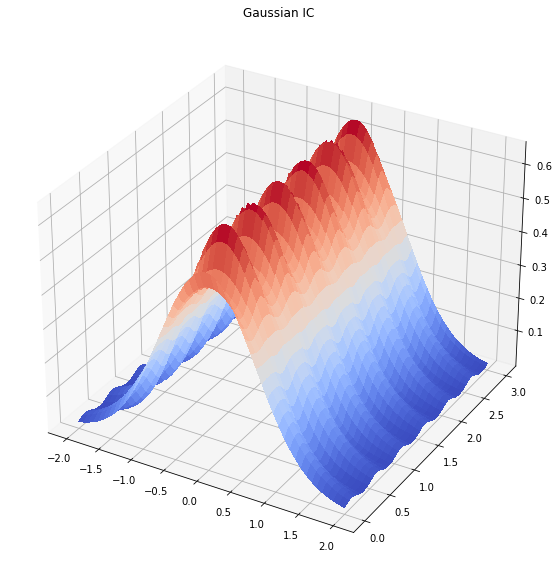

MovieWriter ffmpeg unavailable; using Pillow instead.


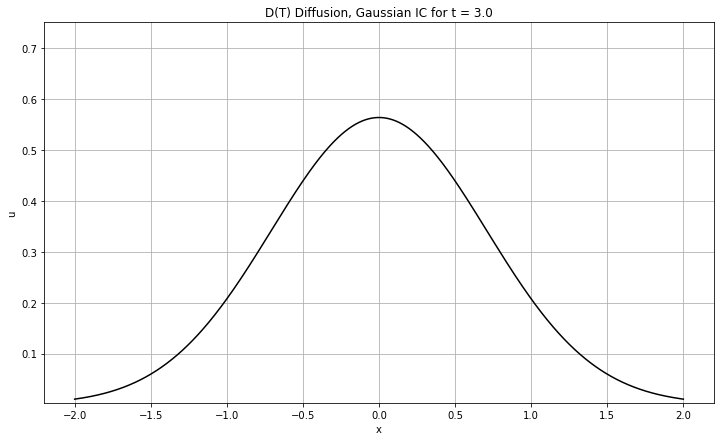

In [90]:
T = 3
Nt = 80
t = np.linspace(0, T, Nt)
x = np.linspace(-2,2,2000)

X,T = np.meshgrid(x,t)
u = gaussian_ic(X,T)
print(np.max(u))
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('Gaussian IC')
plt.show()


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,7))

def init():
    ax.plot(x, gaussian_ic(x,0))
def update(i):
    ax.cla()
    time = t[i]
    #print(time)
    ax.plot(x, gaussian_ic(x, time),color = 'black')
    ax.set_title(f'D(T) Diffusion, Gaussian IC for t = {round(time,2)}')
    ax.set_ylim([np.min(u),np.max(u)+0.1])
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.grid()
    fig.set_facecolor('xkcd:white')
ani = FuncAnimation(fig,  update, range(0, Nt), init_func=init)
writer = PillowWriter(fps = 5)
ani.save(f'Movies/gaussian_ic_linear.gif')
        

MovieWriter ffmpeg unavailable; using Pillow instead.


1.6528249120474283


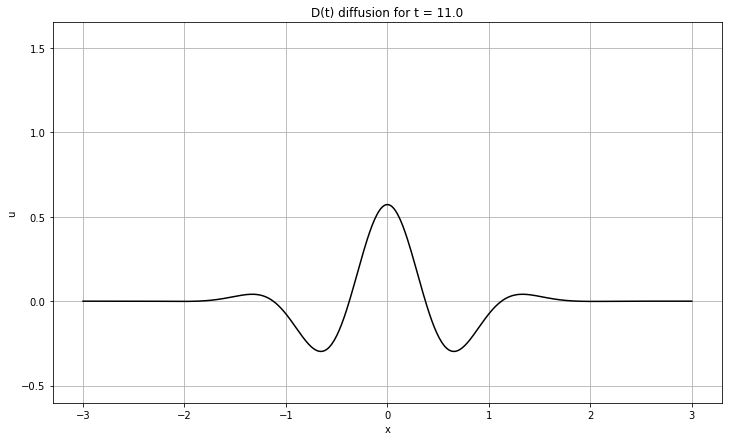

In [106]:
T = 11
Nt = 150
t = np.linspace(0, T, Nt)
x = np.linspace(-3,3,500)
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,7))
X,T = np.meshgrid(x,t)
u = wavelet_ic(X,T)
print(np.max(u))
def init():
    ax.plot(x, wavelet_ic(x,0))
def update(i):
    ax.cla()
    time = t[i]
    #print(time)
    ax.plot(x, wavelet_ic(x, time),color = 'black')
    ax.set_title(f'D(t) diffusion for t = {round(time,2)}')
    ax.set_ylim([np.min(u),np.max(u)])
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.grid()
    fig.set_facecolor('xkcd:white')
ani = FuncAnimation(fig,  update, range(0, Nt), init_func=init)
writer = PillowWriter(fps = 5)
ani.save(f'Movies/wavelet_ic_linear.gif')

<Figure size 720x720 with 0 Axes>

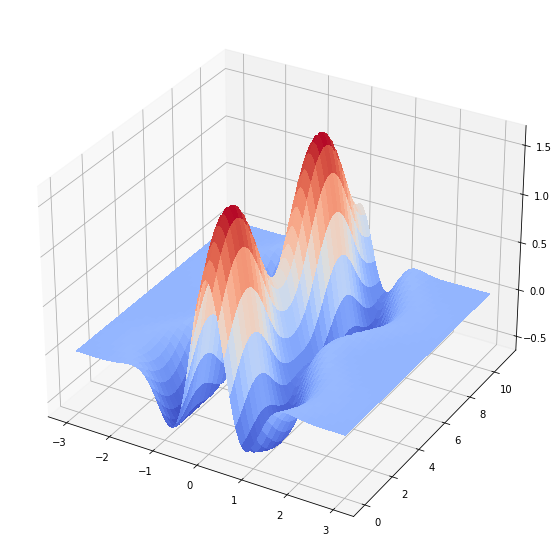

In [104]:
T = 11
Nt = 75
t = np.linspace(0, T, Nt)
x = np.linspace(-3,3,500)

X,T = np.meshgrid(x,t)
u = wavelet_ic(X,T)
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()


In [115]:
## Transport
c = 1
beta = 1
Omega = 2*np.pi+0.01
Gamma = np.pi/4
def gaussian_ic_transport(x,t):
    return np.sqrt(beta/np.pi)*1/np.sqrt(4*Gamma*beta/Omega*np.sin(Omega*t)+1)*np.exp(-beta*(x-c*t)**2/(4*Gamma*beta/Omega*np.sin(Omega*t)+1))
gaussian_ic_transport = np.vectorize(gaussian_ic_transport)

0.7972498888077352


<Figure size 720x720 with 0 Axes>

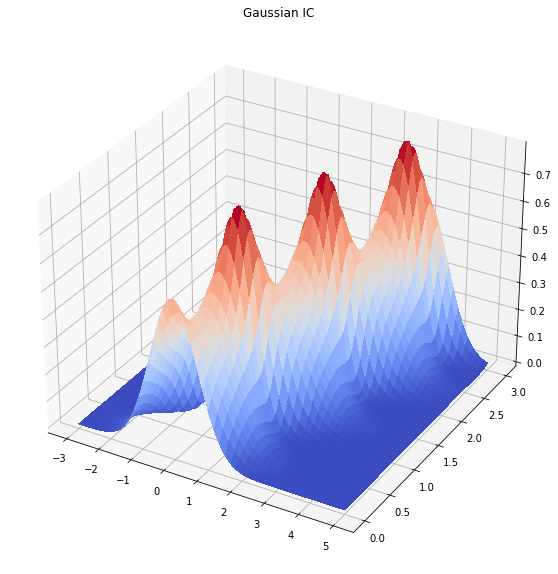

MovieWriter ffmpeg unavailable; using Pillow instead.


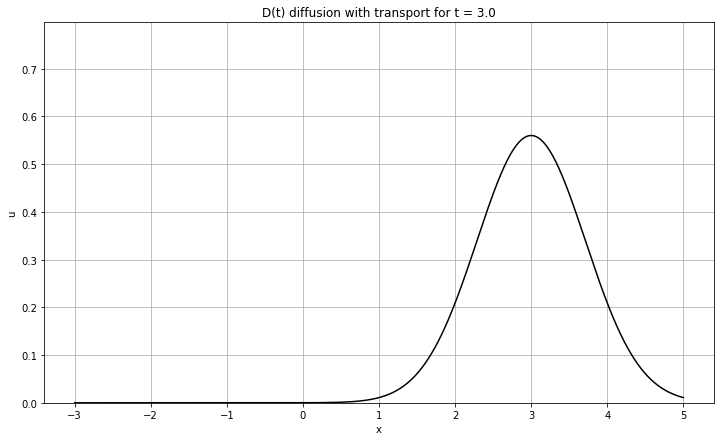

In [120]:
T = 3
Nt = 80
t = np.linspace(0, T, Nt)
x = np.linspace(-3,5,2000)

X,T = np.meshgrid(x,t)
u = gaussian_ic_transport(X,T)
print(np.max(u))
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('Gaussian IC')
plt.show()
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,7))
def init():
    ax.plot(x, gaussian_ic_transport(x,0))
def update(i):
    ax.cla()
    time = t[i]
    #print(time)
    ax.plot(x, gaussian_ic_transport(x, time),color = 'black')
    ax.set_title(f'D(t) diffusion with transport for t = {round(time,2)}')
    ax.set_ylim([np.min(u),np.max(u)])
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.grid()
    fig.set_facecolor('xkcd:white')
ani = FuncAnimation(fig,  update, range(0, Nt), init_func=init)
writer = PillowWriter(fps = 5)
ani.save(f'Movies/transport_gaussian_ic_linear.gif')